### Train/Test Split

***

### Introduction:

### Train/Test Split is a crucial technique in machine learning for evaluating model performance and preventing overfitting. When building and training a machine learning model, it is essential to assess how well it generalizes to new, unseen data. Train/Test Split involves dividing the available dataset into two subsets: one for training the model (training set) and the other for evaluating its performance (test set). 

### By training the model on the training set and then testing it on the independent test set, we can assess its ability to generalize to new data. This approach helps in detecting overfitting, where a model performs well on the training data but fails to generalize to new observations. 

### This section is an extension of the previous section. Here, we will split the dataset into a training and test set, thus optimizing model training.

***

### Importing libraries and data

In [1]:
# Importing libraries
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data
df = pd.read_excel('apartments.xlsx')
df.head()

,Size,Price
0,11,7000
1,25,101000
2,33,181000
3,35,165000
4,39,273000


### Visualizing the size and price of apartments

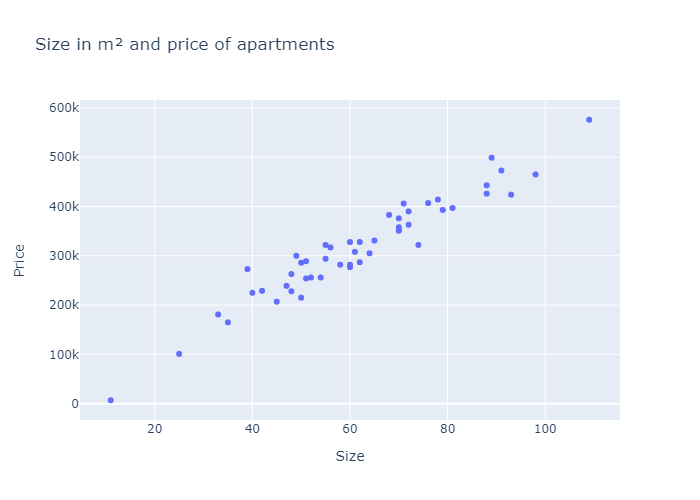

In [3]:
fig = px.scatter(df, x="Size", y="Price", title="Size in m² and price of apartments")
fig.show("png")

### Train/Test Split using 75% of data for training and 25% of data for testing

In [4]:
# Define features and target variable
X = df[['Size']]
y = df[['Price']]

# Performing a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Joining the data for visualization
train_df = X_train.join(y_train, how = 'inner')
test_df = X_test.join(y_test, how = 'inner')

# Adding more information to the dataframe
train_df['Type'] = 'Training Data'
test_df['Type'] = 'Testing Data'

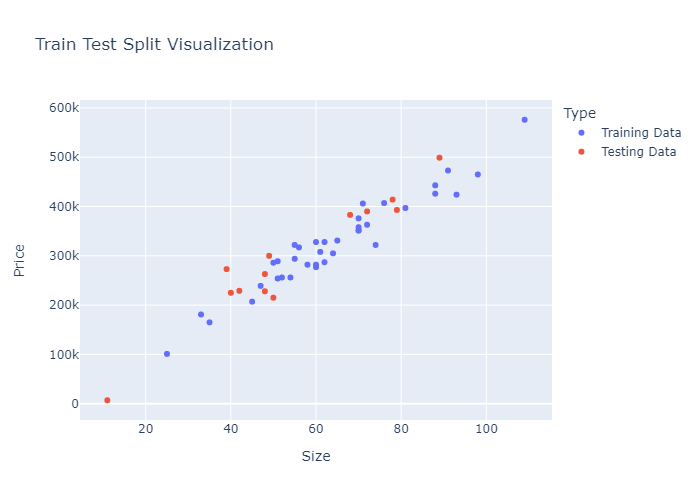

In [5]:
# Visualizing the train test split using a scatter plot
split_viz = pd.concat([train_df, test_df], axis=0)

fig = px.scatter(split_viz, x='Size', y='Price', color = 'Type', title='Train Test Split Visualization')
fig.show("png")

### Training a Simple Linear Regression model with the training data and making predictions on the testing data

In [6]:
# Instantiate model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Generating predictions
y_pred = model.predict(X_test)

### Visualizing the predictions

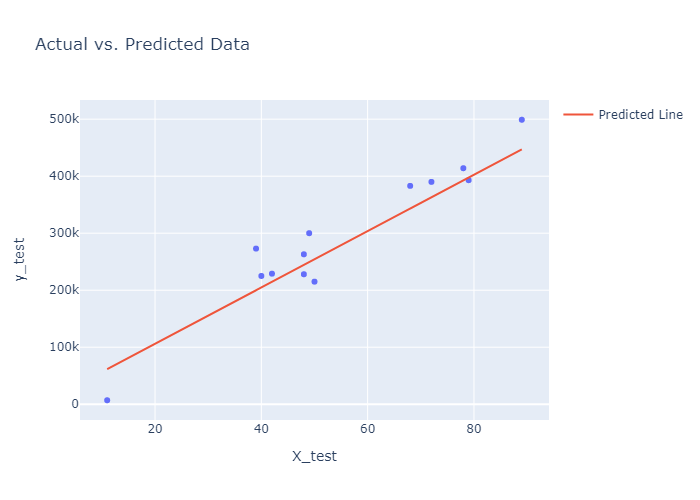

In [7]:
pred_viz = pd.DataFrame({'X_test': X_test.squeeze(), 'y_test': y_test.squeeze(), 'y_pred': y_pred.squeeze()})

fig = px.scatter(pred_viz, x='X_test', y='y_test', title='Actual vs. Predicted Data')
fig.add_scatter(x=pred_viz['X_test'], y=pred_viz['y_pred'], mode='lines', name='Predicted Line')
fig.show("png")

***

### Conclusion:

### In this project, we implemented the Train/Test Split technique to evaluate the performance of a Simple Linear Regression model for predicting apartment prices based on their size. The dataset was divided into training and testing sets using a 75/25 split ratio, ensuring that the model was trained on a sufficiently large portion of the data while retaining a separate portion for evaluation. Visualizing the split highlighted how the data points were distributed between the training and testing sets, crucial for understanding the model's ability to generalize.

### After training the Linear Regression model on the training data, predictions were generated using the test set. The scatter plot depicting actual versus predicted prices showcased how closely the model's predictions aligned with the true values. 

### This process not only validated the model's performance but also demonstrated the importance of Train/Test Split in assessing and improving model accuracy before deployment.